In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
             "Potato-Leaf",
              shuffle=True,
              image_size= (IMAGE_SIZE,IMAGE_SIZE),
              batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Early Blight', 'Healthy', 'Late Blight']

In [5]:
len(dataset)

68

In [6]:
68*32

2176

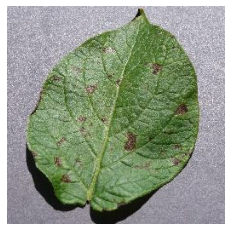

In [7]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[2].numpy().astype("uint8"))
    plt.axis("off")

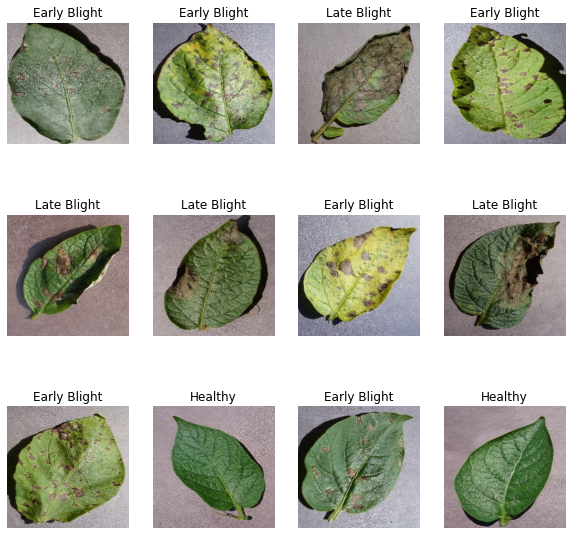

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [9]:
print(image_batch[20])

tf.Tensor(
[[[143. 124. 130.]
  [139. 120. 126.]
  [150. 131. 137.]
  ...
  [145. 125. 134.]
  [138. 118. 127.]
  [124. 104. 113.]]

 [[138. 119. 125.]
  [117.  98. 104.]
  [150. 131. 137.]
  ...
  [125. 105. 114.]
  [185. 165. 174.]
  [110.  90.  99.]]

 [[146. 127. 133.]
  [154. 135. 141.]
  [138. 119. 125.]
  ...
  [158. 138. 147.]
  [114.  94. 103.]
  [110.  90.  99.]]

 ...

 [[164. 149. 156.]
  [176. 161. 168.]
  [228. 213. 220.]
  ...
  [193. 180. 187.]
  [194. 181. 188.]
  [167. 154. 161.]]

 [[146. 131. 138.]
  [151. 136. 143.]
  [139. 124. 131.]
  ...
  [219. 206. 213.]
  [167. 154. 161.]
  [163. 150. 157.]]

 [[221. 206. 213.]
  [174. 159. 166.]
  [158. 143. 150.]
  ...
  [201. 188. 195.]
  [163. 150. 157.]
  [150. 137. 144.]]], shape=(256, 256, 3), dtype=float32)


(-0.5, 255.5, 255.5, -0.5)

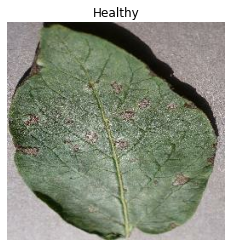

In [10]:
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.title(class_names[label_batch[20]])
plt.axis('off')

In [11]:
80% ==  training
20% ==  --> 10% validation, 10% test

SyntaxError: invalid syntax (519517558.py, line 1)

In [12]:

train_size=0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds = dataset.take(54)

In [14]:
len(train_ds)

54

In [15]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [16]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [17]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds =ds.shuffle(shuffle_size,seed=1)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds 

In [19]:
train_ds,val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape =(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3

In [27]:
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu', input_shape =input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation ='softmax'),
])

model.build(input_shape=input_shape)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [29]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [30]:
history=model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 143s 3s/step - loss: 0.8945 - accuracy: 0.5006 - val_loss: 0.8615 - val_accuracy: 0.6042
Epoch 2/50
54/54 [==============================] - 154s 3s/step - loss: 0.7470 - accuracy: 0.6476 - val_loss: 0.5664 - val_accuracy: 0.7135
Epoch 3/50
54/54 [==============================] - 128s 2s/step - loss: 0.5410 - accuracy: 0.7500 - val_loss: 0.5530 - val_accuracy: 0.7448
Epoch 4/50
54/54 [==============================] - 130s 2s/step - loss: 0.3934 - accuracy: 0.8281 - val_loss: 0.3661 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 122s 2s/step - loss: 0.3307 - accuracy: 0.8582 - val_loss: 0.2819 - val_accuracy: 0.8750
Epoch 6/50
54/54 [==============================] - 116s 2s/step - loss: 0.2324 - accuracy: 0.9086 - val_loss: 0.2289 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 133s 2s/step - loss: 0.2020 - accuracy: 0.9213 - val_loss: 0.1250 - val_accuracy: 0.9583
Epoch 8/50
54

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 12s 537ms/step - loss: 0.0026 - accuracy: 1.0000


In [32]:
scores

[0.002583000808954239, 1.0]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
history.history['accuracy']

[0.5005787014961243,
 0.6475694179534912,
 0.75,
 0.828125,
 0.8582175970077515,
 0.9085648059844971,
 0.9212962985038757,
 0.9276620149612427,
 0.9265046119689941,
 0.9456018805503845,
 0.9322916865348816,
 0.9450231194496155,
 0.9577546119689941,
 0.9710648059844971,
 0.9618055820465088,
 0.9629629850387573,
 0.9646990895271301,
 0.9699074029922485,
 0.9739583134651184,
 0.9762731194496155,
 0.9728009104728699,
 0.9820601940155029,
 0.9797453880310059,
 0.9890046119689941,
 0.9849537014961243,
 0.9785879850387573,
 0.9878472089767456,
 0.9930555820465088,
 0.9716435074806213,
 0.9936342835426331,
 0.9826388955116272,
 0.9924768805503845,
 0.9901620149612427,
 0.9913194179534912,
 0.9814814925193787,
 0.9895833134651184,
 0.9976851940155029,
 0.9959490895271301,
 0.9907407164573669,
 0.9890046119689941,
 0.9959490895271301,
 0.9884259104728699,
 0.9872685074806213,
 0.9918981194496155,
 0.9820601940155029,
 0.9629629850387573,
 0.9918981194496155,
 0.9901620149612427,
 0.9982638955116

In [37]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

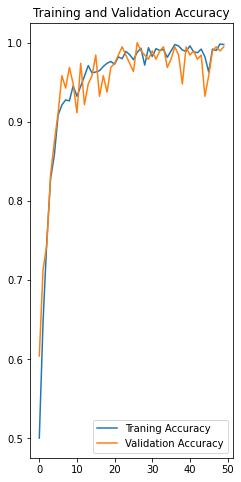

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc,label='Traning Accuracy')
plt.plot(range(EPOCHS), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

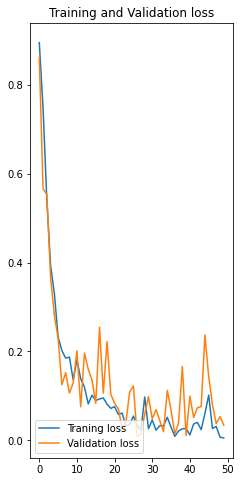

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss,label='Traning loss')
plt.plot(range(EPOCHS), val_loss,label='Validation loss')
plt.legend(loc='lower left')
plt.title('Training and Validation loss')
plt.show()

In [51]:
import numpy as np

In [54]:
np.argmax([1.0000000e+00,4.5362064e-18,2.2685365e-09])

0

first image to predict
actual label: Late Blight
1/1 [==============================] - 17s 17s/step
predicted label: Late Blight


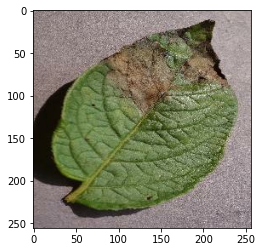

In [60]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [71]:
def predict(model, img):
    img_array =tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 2s 2s/step


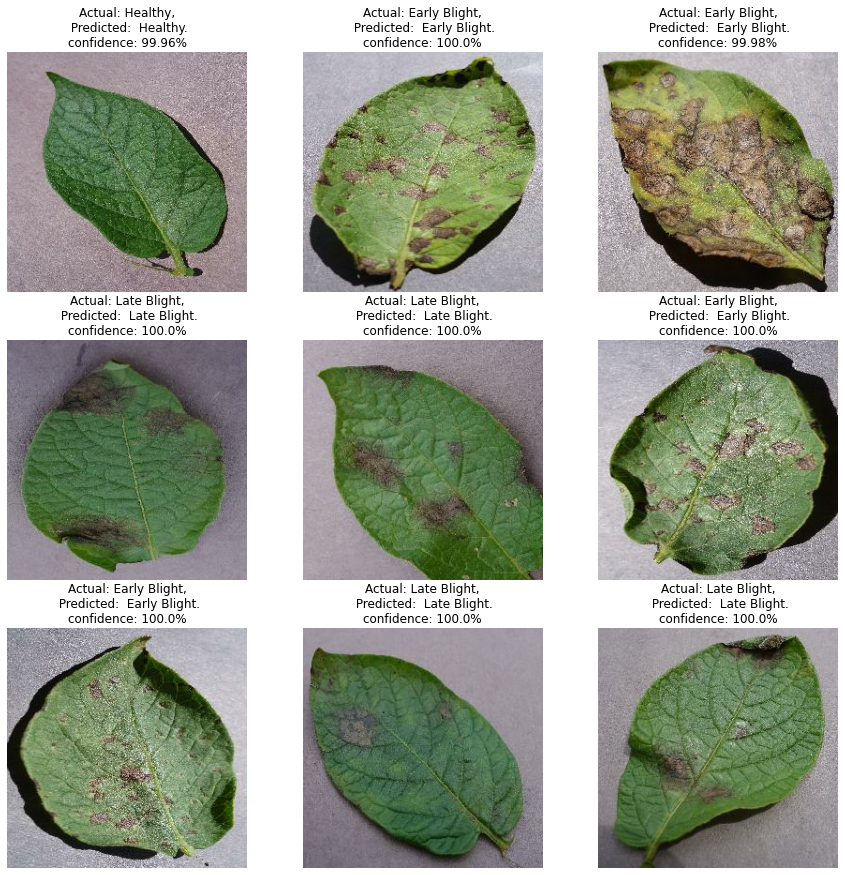

In [72]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i +1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted:  {predicted_class}.\nconfidence: {confidence}%")
        plt.axis("off")

In [78]:
import os
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
